In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [2]:
mnist =  fetch_mldata("MNIST original")

In [3]:
mnist


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X,Y=mnist["data"],mnist["target"]

In [5]:
np.sqrt(np.shape(X)[1])

28.0

In [6]:
import matplotlib
import matplotlib.pyplot as plt

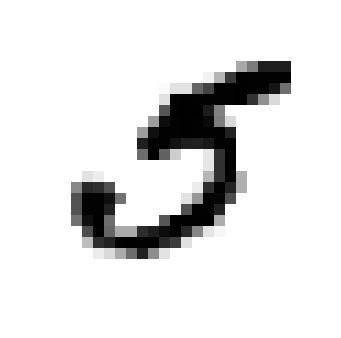

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
shuffle_index = np.random.permutation(60000)

In [9]:
#Cross validation
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

In [10]:
y_train_5 = (y_train==5)

In [11]:
y_test_5=(y_test==5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [13]:
predicted=sgd_clf.predict(X[36000].reshape(1,-1))

In [14]:
predicted

array([ True], dtype=bool)

# Measuring performance - Cross validation - with accuacy

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
from IPython.core.debugger import set_trace
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    #set_trace()
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9651
0.9651
0.94495


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9651 ,  0.9651 ,  0.94495])

# Verify with a dumb estimator accuacy is not a good measurement

In [17]:
from sklearn.base import BaseEstimator

In [18]:
class DumbEstimator(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [19]:
#As u see, data itself is skewed to non-5, result is still above 90% accuracy
dumb = DumbEstimator()
cross_val_score(dumb, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.90825,  0.90925,  0.91145])

# Confusion MAtrix

In [20]:
from sklearn.model_selection import cross_val_predict
#get the prediction result
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53758,   821],
       [ 1676,  3745]])

In [22]:
from sklearn.metrics import precision_score, recall_score
#related to false alarm
precision_score(y_train_5, y_train_pred)

0.82019272886552785

In [23]:
#related to miss rate
recall_score(y_train_5, y_train_pred)

0.6908319498247556

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.74997496745769499

# Decision function

In [25]:
y_scores = sgd_clf.decision_function([some_digit])

In [26]:
y_scores

array([ 157954.9349525])

In [27]:
y_some_digit_predit = (y_scores>0)

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

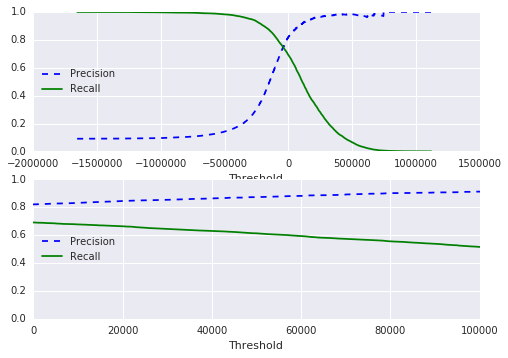

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
    plt.subplot(212)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.axis([0, 100000,0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [31]:
#Pick threshold = 80000
Threshold=80000
y_some_digit_predit = (y_scores>Threshold)
precision=precision_score(y_train_5, y_some_digit_predit)
recall = recall_score(y_train_5, y_some_digit_predit)

In [32]:
precision

0.9004484304932735

In [33]:
recall

0.55561704482567786

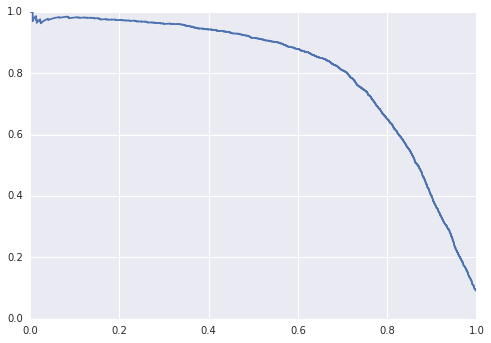

In [34]:
plt.plot(recalls, precisions)

In [35]:
plt.show()

# ROC curve

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

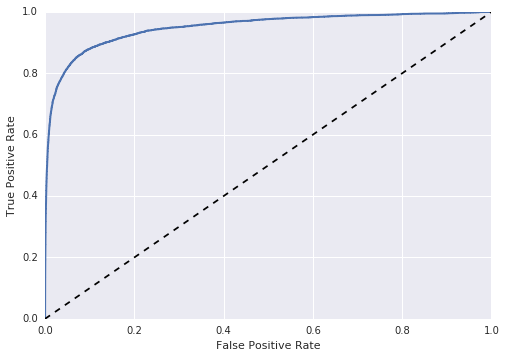

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
#Area under the ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95012174135301186

In [39]:
#Switch to a more adv model
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

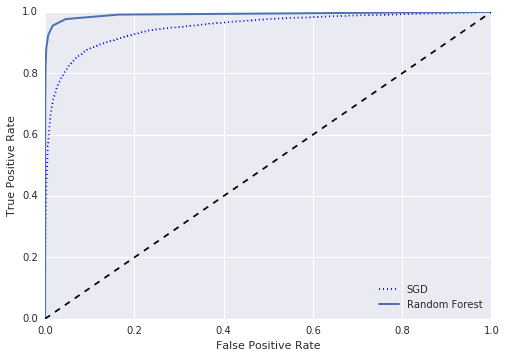

In [41]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.99181567100606238

In [43]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [44]:
sgd_clf.predict([some_digit])

array([ 5.])

In [45]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [46]:
some_digit_scores

array([[  31045.13976534, -586759.11546788, -404030.34749735,
          37270.96480406, -445290.2194769 ,  157954.9349525 ,
        -664773.62719352, -196836.75160477, -653095.69648631,
        -592784.9684613 ]])

In [47]:
np.argmax(some_digit_scores)

5

In [48]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

5.0

In [49]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [50]:
forest_clf.predict([some_digit])

array([ 5.])

In [51]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [52]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.86117776,  0.87179359,  0.87183077])

In [53]:
#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [54]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91336733,  0.9100455 ,  0.90773616])

In [55]:
print("mean {0}, std {1}".format(X_train_scaled.mean(),X_train_scaled.std()))

mean 9.927055398417046e-19, std 0.9563162742140077


In [56]:
print("mean {0}, std {1}".format(X_train.mean(),X_train.std()))

mean 33.318421449829934, std 78.56748998339815


In [57]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [58]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [59]:
conf_mx

array([[5735,    3,   21,   10,   13,   50,   44,    7,   37,    3],
       [   2, 6496,   44,   29,    6,   37,    8,   10,   99,   11],
       [  58,   39, 5343,   92,   80,   21,   90,   57,  162,   16],
       [  56,   39,  148, 5321,    2,  231,   40,   50,  142,  102],
       [  26,   28,   37,    8, 5343,    8,   51,   30,   79,  232],
       [  79,   43,   37,  173,   78, 4607,  116,   24,  165,   99],
       [  36,   21,   50,    3,   40,   78, 5642,    6,   42,    0],
       [  27,   21,   67,   27,   47,    8,    5, 5799,   15,  249],
       [  55,  167,   73,  138,   17,  151,   53,   24, 5035,  138],
       [  44,   33,   28,   87,  156,   30,    2,  185,   82, 5302]])

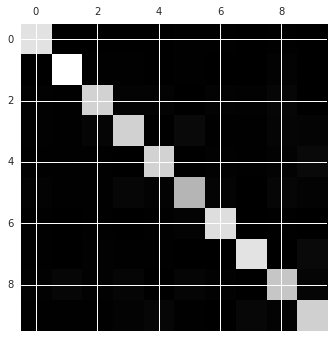

In [60]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [61]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

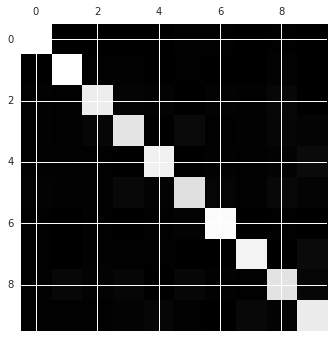

In [62]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

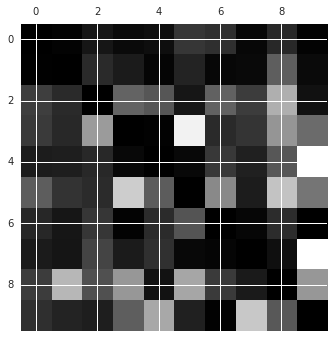

In [63]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [64]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

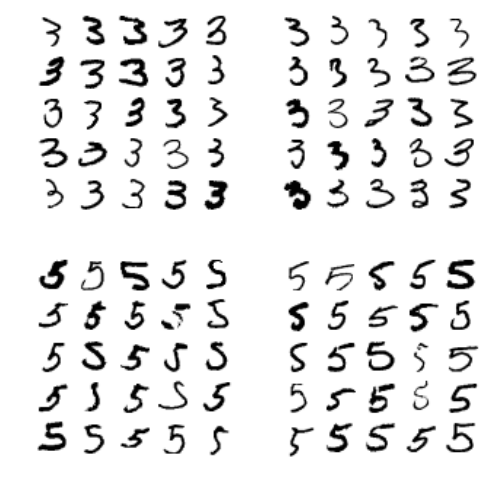

In [65]:

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# MultiLabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
#evaluate
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# MultiLabel

In [66]:
#Noise removal
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [71]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

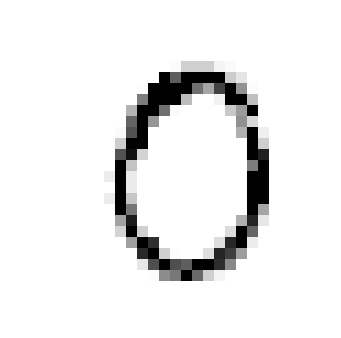

In [72]:
some_index=2
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

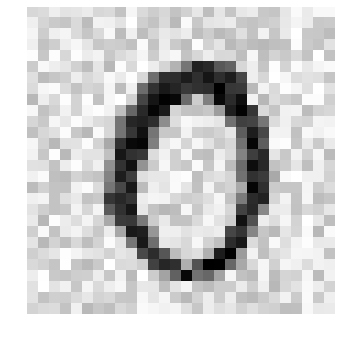

In [73]:
plot_digit(X_test_mod[some_index])